Francis Anscombe [1] created and presented four small sets of data. You can find them on the course web site at http://www.math. caltech.edu/%7E2015-16/2term/ma003/Data/Anscombe1.txt, Anscombe2, Anscombe3, and Anscombe4. Each data set has 11 observations on two variates labeled X and Y . (Each file has a header line.)  For each data set,

### Exercise 2.1

Compute the sample mean and standard deviation of $X$ and $Y$.

See code below. $\square$

In [60]:
import numpy as np
print(x[1].size)

11


In [10]:
# Anscombe data
x = {}
y = {}

# Anscombe 1
x[1] = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y[1] = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Anscombe 2
x[2] =  x[1]
y[2] = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

# Anscombe 3
x[3] = x[1]
y[3] = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

# Anscombe 4
x[4] = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y[4] = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [61]:
for i in range(1, 4+1):
    print("Mean x{0} = {1}".format(i, np.mean(x[i])))
    print("SD x{0} = {1}".format(i, np.std(x[i]*np.sqrt(x[i].size)/np.sqrt(x[i].size-1))))
    print("\n")
    print("Mean y{0} = {1}".format(i, np.mean(y[i])))
    print("SD y{0} = {1}".format(i, np.std(y[i])*np.sqrt(y[i].size)/np.sqrt(y[i].size-1)))
    print("\n")

Mean x1 = 9.0
SD x1 = 3.3166247903554


Mean y1 = 7.500909090909093
SD y1 = 2.031568135925815


Mean x2 = 9.0
SD x2 = 3.3166247903554


Mean y2 = 7.50090909090909
SD y2 = 2.0316567355016177


Mean x3 = 9.0
SD x3 = 3.3166247903554


Mean y3 = 7.5
SD y3 = 2.030423601123667


Mean x4 = 9.0
SD x4 = 3.3166247903553994


Mean y4 = 7.500909090909091
SD y4 = 2.0305785113876023




### Exericse 2.2

Regress $Y$ on $X$ and a constant term.

#### B_OLS

In [44]:
# Compute B_OLS
X = {}
B = {}
# column of 1s for constant term
a = np.full(shape=(11,1), fill_value=1)
for i in range(1, 4+1):
    X[i] = np.column_stack(tup=(a, x[i].T))
    B[i] = np.linalg.inv(X[i].T.dot(X[i])).dot(X[i].T).dot(y[i])

In [45]:
print(B)

{1: array([3.00009091, 0.50009091]), 2: array([3.00090909, 0.5       ]), 3: array([3.00245455, 0.49972727]), 4: array([3.00172727, 0.49990909])}


#### Error term

In [59]:
# Compute the error term
E = {}
for i in range(1, 4+1):
    E[i] = y[i] - X[i].dot(B[i])
#print(np.linalg.norm(E[i]))
#print(np.sqrt(E[1].T.dot(E[1])))

3.7070864570441304
3.709809968178963


#### Residual standard errors

In [64]:
# Residual standard error
S = {}
# We have N=11 observations in our case
N = 11
# There are 2 variates in our case
K = 2
for i in range(1, 4+1):
    S[i] = np.sqrt(E[i].T.dot(E[i]))/np.sqrt(N-K)
#print(np.sqrt(N-K))
#print(np.sqrt(E[1].T.dot(E[1])))
print(S)

{1: 1.2366033227263211, 2: 1.2372142053415771, 3: 1.2363113513899957, 4: 1.2356954856813769}


#### t-statistics

In [103]:
# Compute t-statistics.  The null hypothese are B\equiv 0
T = {}
for i in range(1, 4+1):
    temp = []
    for k in range(0, 1+1):
        t = B[i][k]/(S[i] * np.sqrt(np.linalg.inv(X[i].T.dot(X[i]))[k][k]))
        #print(S[i] * np.sqrt(np.linalg.inv(X[i].T.dot(X[i]))[k][k]))
        temp.append(t)
    T[i] = temp
#print(T)
print(T)

{1: [2.6673478276243574, 4.241455288892834], 2: [2.6667578844468824, 4.238590389772446], 3: [2.6700797366051066, 4.239372102496929], 4: [2.6707634084798464, 4.24302818859164]}


#### $p$-value of t-statistic

In [104]:
from scipy.stats import t

In [105]:
# initiate rv with t(N-K) distribution
a = t(df=9)

In [106]:
print(2*(1-a.cdf(T[1][0])))

0.025734051399162627


#### Do we reject the null hypotheses that $\beta_0,\beta_1=0$?

From Lecture 24, we reject the null hypothesis if
\begin{equation}
|t|>t_{\alpha/2,N-K}.
\end{equation}
Let us use $\alpha=0.05$.  Furthermore, in our case, $N-K=11-2=9$.  Therefore, we need the value of $t_{0.025,9}$.  From Lecture 20, we use the approximation
\begin{equation}
t_{0.025,9}\approx=2.27.
\end{equation}
All of our $t$-statistics are greater than this, so we can reject all the null hypotheses. $\square$

#### $R^2$

In [77]:
R2 = {}
for i in range(1, 4+1):
    R2[i] = 1 - ( E[i].T.dot(E[i])) / (np.var(y[i])*y[i].size)
    # The caltech notes use the definition below, and they disagree...
    # R2[i] = B[i].T.dot(X[i].T).dot(X[i]).dot(B[i]) / (y[i].T.dot(y[i]))
print(R2)

{1: 0.666542459508775, 2: 0.6662420337274844, 3: 0.6663240410665593, 4: 0.6667072568984653}


#### Adjusted $R^2$

In [74]:
adjR2 = {}
for i in range(1, 4+1):
    adjR2[i] = 1 - (N-1)/(N-K)*(1-R2[i])
print(adjR2)

{1: 0.6294916216764166, 2: 0.6291578152527604, 3: 0.6292489345183991, 4: 0.6296747298871836}


#### F statistics

In [65]:
# Compute t-statistics.  The null hypothese are B\equiv 0
F = {}
for i in range(1, 4+1):
    temp = []
    for j in range(0, 1+1):
        f = B[i][j]**2 * np.linalg.inv(X[i].T.dot(X[i]))[j][j]**(-1) / S[i]**2
        #print(S[i] * np.sqrt(np.linalg.inv(X[i].T.dot(X[i]))[k][k]))
        temp.append(f)
    F[i] = temp
print(F)

{1: [7.11474443353238, 17.989942967677], 2: [7.111597614259612, 17.965648492271335], 3: [7.129325799829198, 17.972275823429232], 4: [7.132977184074889, 18.003288209183246]}


#### $p$-value of $F$-statistic

In [115]:
from scipy.stats import f

In [116]:
a = f(dfn=K-1, dfd=N-K)

In [124]:
print(1-a.cdf(F[4][1]))

0.0021646023471971754


#### Sum of squared residuals

In [125]:
for i in range(1,4+1):
    print(E[i].T.dot(E[i]))

13.76269
13.776290909090909
13.756191818181815
13.742490000000004


#### Normal residuals?

Below we perform a Kolmogorov-Smirnov test.  We fail to reject the null hypothesis (that they are normally distributed) for all 4 data sets. $\square$

In [148]:
from scipy import stats

In [211]:
K = 2
for i in range(1, 4+1):
    e = E[i]
    N = e.size
    # u_null = 0
    u = 0
    # We don't know \sigma!  So we have to estimate it...
    # We estimate it as as the residual standard error
    s = np.sqrt(e.T.dot(e)/(N-K))
    # print(s)
    # null distribution...with estimated s!
    G = stats.norm(loc=u, scale=s)
    # perform k test
    print(stats.kstest(rvs=e, cdf=G.cdf, alternative='two-sided'))

KstestResult(statistic=0.17225244738747347, pvalue=0.8998580721306306)
KstestResult(statistic=0.18478858959658395, pvalue=0.8467902485983785)
KstestResult(statistic=0.28571794195559186, pvalue=0.2747576120749421)
KstestResult(statistic=0.12377463974575498, pvalue=0.9959596954934722)


### Exercise 2.3

Do these results allow you to conclude anything about the similarities and/or differences in the relationship between $X$ and $Y$ in these different data sets?

No.  They're basically all the same. $\square$

### Exercise 2.4

In [129]:
from matplotlib import pyplot as plt

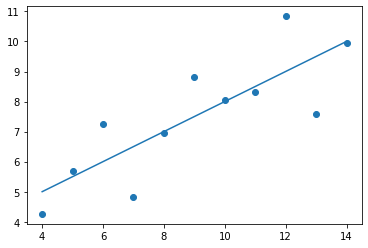

In [145]:
plt.clf()
# data 1
plt.scatter(x[1], y[1])
# regression line 1
x1 = [4, 14]
y1 = [B[1][0]+x1[0]*B[1][1], B[1][0]+x1[1]*B[1][1]]
plt.plot(x1, y1)
plt.show()

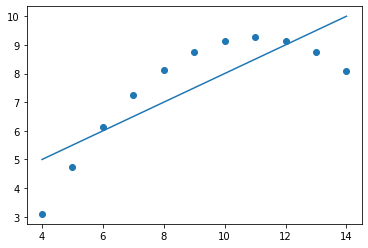

In [144]:
plt.clf()
# data 2
plt.scatter(x[2], y[2])
# regression line 2
x2 = [4, 14]
y2 = [B[2][0]+x2[0]*B[2][1], B[2][0]+x2[1]*B[2][1]]
plt.plot(x2, y2)
plt.show()

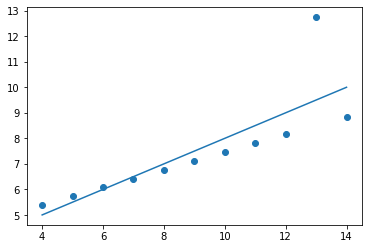

In [143]:
plt.clf()
# data 3
plt.scatter(x[3], y[3])
# regression line 3
x3 = [4, 14]
y3 = [B[3][0]+x3[0]*B[3][1], B[3][0]+x3[1]*B[3][1]]
plt.plot(x3, y3)
plt.show()

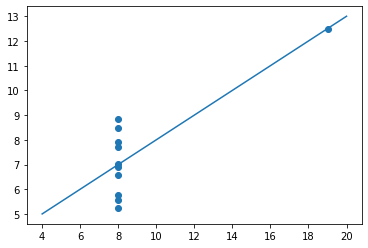

In [142]:
plt.clf()
# data 4
plt.scatter(x[4], y[4])
# regression line 4
x4 = [4, 20]
y4 = [B[4][0]+x4[0]*B[4][1], B[4][0]+x4[1]*B[4][1]]
plt.plot(x4, y4)
plt.show()

### Exercise 2.5

For each data set, create a Normal $Q-Q$ plot of the residuals, and perform a Kolmogorov–Smirnov test for normality of the residuals. For which data sets you reject the hypothesis?

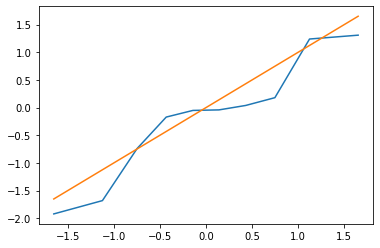

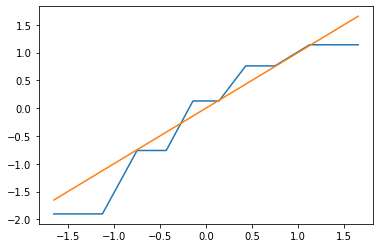

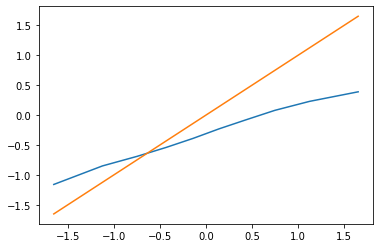

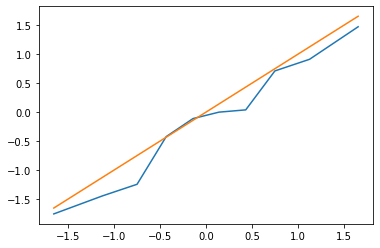

In [247]:
for j in range(1, 4+1):
    #
    # empirical cdf and quantiles
    #
    e = sorted(list(E[j]))
    cdf_e = {e[i]: (i+1)/len(e) for i in range(len(e))}
    q_e = {value:key for key,value in cdf_e.items()}
    #
    # theoretical cdf and quantile
    #
    e = E[j]
    N = e.size
    # u_null = 0
    u = 0
    # We don't know \sigma!  So we have to estimate it...
    # We estimate it as as the residual standard error
    s = np.sqrt(e.T.dot(e)/(N-K))
    # null distribution...with estimated s!
    G = stats.norm(loc=u, scale=s)
    x = [G.ppf(key) for key in q_e.keys()]
    plt.clf()
    plt.plot(x, q_e.values())
    plt.plot([min(x), x[-2]], [min(x), x[-2]])
    plt.show()

### Exercise 2.6

Do these scatter plots allow you to conclude anything about the similarities and/or differences in the relationship between $X$ and $Y$ in these different data sets?

Yes!  They're all pretty terrible fits, but in different ways.  The first plot is *maybe* the most reasonable. $\square$

### Exercise 2.7

Which data set(s) come closest to satisfying the assumptions of the stan- dard linear model?

Probably data set 1. $\square$